In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("Mexico_real_Estate-1.csv", index_col=0)
df2 = pd.read_csv("Mexico_real_Estate-2.csv", index_col=0)
df3 = pd.read_csv("Mexico_real_Estate-3.csv", index_col=0)

# Cleaing of df1

In [3]:
# check the shape (number of rows and cols)
print("Shape of df1: ", df1.shape)

Shape of df1:  (700, 7)


In [4]:
#Get info about data types and values
print("\nInfo of df1: ")
df1.info()


Info of df1: 
<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S/N            700 non-null    int64  
 1   property_type  700 non-null    object 
 2   state          700 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        700 non-null    int64  
 6    price_usd     700 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 43.8+ KB


In [5]:
# Display the firsr five rows
df1.head()

S/N property_type                            state        lat         lon  \
0    1         house                 Estado de México  19.560181  -99.233528   
1    2         house                       Nuevo León  25.688436 -100.198807   
2    3     apartment                         Guerrero  16.767704  -99.764383   
3    4     apartment                         Guerrero  16.829782  -99.911012   
4    5         house  Veracruz de Ignacio de la Llave        NaN         NaN   

   area_m2   price_usd   
0      150  $67,965.56   
1      186  $63,223.78   
2       82  $84,298.37   
3      150  $94,308.80   
4      175  $94,835.67

In [6]:
df1 = df1.iloc[:, 1:]

In [7]:
# fill missing values
df1 = df1.dropna(subset=['lat', 'lon'])

In [8]:
df1.columns = df1.columns.str.strip()

In [9]:
print(df1.columns)

Index(['property_type', 'state', 'lat', 'lon', 'area_m2', 'price_usd'], dtype='object')


In [10]:
df1.head()

property_type             state        lat         lon  area_m2  \
0         house  Estado de México  19.560181  -99.233528      150   
1         house        Nuevo León  25.688436 -100.198807      186   
2     apartment          Guerrero  16.767704  -99.764383       82   
3     apartment          Guerrero  16.829782  -99.911012      150   
5         house           Yucatán  21.052583  -89.538639      205   

      price_usd  
0   $67,965.56   
1   $63,223.78   
2   $84,298.37   
3   $94,308.80   
5  $105,191.37

In [11]:
# Remove dollar sign
df1['price_usd'] = df1['price_usd'].str.replace('$', '', regex=False)
# Remove commas
df1['price_usd'] = df1['price_usd'].str.replace(',', '', regex=False)

# Convert to float
df1['price_usd']= df1['price_usd'].astype(float)

In [12]:
df1.info()

df1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  583 non-null    object 
 1   state          583 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        583 non-null    int64  
 5   price_usd      583 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 31.9+ KB


property_type             state        lat         lon  area_m2  price_usd
0         house  Estado de México  19.560181  -99.233528      150   67965.56
1         house        Nuevo León  25.688436 -100.198807      186   63223.78
2     apartment          Guerrero  16.767704  -99.764383       82   84298.37
3     apartment          Guerrero  16.829782  -99.911012      150   94308.80
5         house           Yucatán  21.052583  -89.538639      205  105191.37

# Cleaning of df2

In [13]:
df2 = df2.iloc[:, 1:]

In [14]:
print("Shape of df2: ", df2.shape)

df2.info()
df2.head()

Shape of df2:  (700, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    int64  
 5   price_mxn      700 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 38.3+ KB


property_type       state        lat         lon  area_m2  price_mxn
0     apartment  Nuevo León  25.721081 -100.345581       72    1300000
1     apartment      Puebla        NaN         NaN      190    2500000
2         house     Morelos  23.634501 -102.552788      360    5300000
3         house     Morelos        NaN         NaN       76     820000
4         house      Puebla        NaN         NaN      200    1100000

In [15]:
df2.columns = df2.columns.str.strip()

In [16]:
#converting mxn to usd
df2['price_usd'] = df2['price_mxn'] / 19

In [17]:
df2.head()

property_type       state        lat         lon  area_m2  price_mxn  \
0     apartment  Nuevo León  25.721081 -100.345581       72    1300000   
1     apartment      Puebla        NaN         NaN      190    2500000   
2         house     Morelos  23.634501 -102.552788      360    5300000   
3         house     Morelos        NaN         NaN       76     820000   
4         house      Puebla        NaN         NaN      200    1100000   

       price_usd  
0   68421.052632  
1  131578.947368  
2  278947.368421  
3   43157.894737  
4   57894.736842

In [18]:
df2 = df2.drop(columns=['price_mxn'])

In [19]:
df2.head()

property_type       state        lat         lon  area_m2      price_usd
0     apartment  Nuevo León  25.721081 -100.345581       72   68421.052632
1     apartment      Puebla        NaN         NaN      190  131578.947368
2         house     Morelos  23.634501 -102.552788      360  278947.368421
3         house     Morelos        NaN         NaN       76   43157.894737
4         house      Puebla        NaN         NaN      200   57894.736842

In [20]:
df2 = df2.dropna()

In [21]:
print("\nUpdated info of df2")

df2.info()

df2.head()


Updated info of df2
<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  571 non-null    object 
 1   state          571 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        571 non-null    int64  
 5   price_usd      571 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 31.2+ KB


property_type             state        lat         lon  area_m2  \
0     apartment        Nuevo León  25.721081 -100.345581       72   
2         house           Morelos  23.634501 -102.552788      360   
6     apartment  Estado de México  19.272040  -99.572013       85   
7         house   San Luis Potosí  22.138882 -100.996510      158   
8     apartment  Distrito Federal  19.394558  -99.129707       65   

       price_usd  
0   68421.052632  
2  278947.368421  
6   65789.473684  
7  111578.947368  
8   39904.736842

# Cleaning df3

In [22]:
df3 = df3.iloc[:, 1:]

In [23]:
print("shape of df3: ", df3.shape)

df3.info()

df3.head()

shape of df3:  (700, 5)
<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    int64  
 4   price_usd                700 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 32.8+ KB


property_type                            place_with_parent_names  \
0     apartment  |MÃ©xico|Distrito Federal|Gustavo A. Madero|Ac...   
1         house         |MÃ©xico|Estado de MÃ©xico|Toluca|Metepec|   
2         house  |MÃ©xico|Estado de MÃ©xico|Toluca|Toluca de Le...   
3         house       |MÃ©xico|Morelos|Temixco|Burgos Bugambilias|   
4     apartment  |MÃ©xico|Veracruz de Ignacio de la Llave|Verac...   

                  lat-lon  area_m2  price_usd  
0     19.52589,-99.151703       71   48550.59  
1  19.2640539,-99.5727534      233  168636.73  
2    19.268629,-99.671722      300   86932.69  
3                     NaN      275  263432.41  
4    19.511938,-96.871956       84   68508.67

In [24]:
df3.columns = df3.columns.str.strip()

In [25]:
df3 = df3.dropna()

In [26]:
#Spliting lat-lon
df3[['lat', 'lon']] = df3['lat-lon'].str.split(',', expand=True)

In [27]:
#converting them to float
df3['lat'] = df3['lat'].astype(float)
df3['lon'] = df3['lon'].astype(float)

In [28]:
# extract state from 'place_with_parent_names'
df3['state'] = df3['place_with_parent_names'].str.split('|').str[2]

In [29]:
df3 = df3.drop(columns = ['lat-lon', 'place_with_parent_names'])

In [30]:
df3.head()

property_type  area_m2  price_usd        lat         lon  \
0     apartment       71   48550.59  19.525890  -99.151703   
1         house      233  168636.73  19.264054  -99.572753   
2         house      300   86932.69  19.268629  -99.671722   
4     apartment       84   68508.67  19.511938  -96.871956   
5         house      175  102763.00  20.689157 -103.366728   

                             state  
0                 Distrito Federal  
1                Estado de MÃ©xico  
2                Estado de MÃ©xico  
4  Veracruz de Ignacio de la Llave  
5                          Jalisco

In [31]:
df3['state'] = df3['state'].str.replace('MÃ©xico', 'México', regex = False)

In [32]:
df3.head()

property_type  area_m2  price_usd        lat         lon  \
0     apartment       71   48550.59  19.525890  -99.151703   
1         house      233  168636.73  19.264054  -99.572753   
2         house      300   86932.69  19.268629  -99.671722   
4     apartment       84   68508.67  19.511938  -96.871956   
5         house      175  102763.00  20.689157 -103.366728   

                             state  
0                 Distrito Federal  
1                 Estado de México  
2                 Estado de México  
4  Veracruz de Ignacio de la Llave  
5                          Jalisco

# Concatenate df1, df2, and df3

In [33]:
df = pd.concat([df1, df2, df3], ignore_index = True)
print(df.shape)

(1736, 6)


In [34]:
df.head()

property_type             state        lat         lon  area_m2  price_usd
0         house  Estado de México  19.560181  -99.233528      150   67965.56
1         house        Nuevo León  25.688436 -100.198807      186   63223.78
2     apartment          Guerrero  16.767704  -99.764383       82   84298.37
3     apartment          Guerrero  16.829782  -99.911012      150   94308.80
4         house           Yucatán  21.052583  -89.538639      205  105191.37

In [35]:
#df.to_csv("mexico_real_Estate_clean.csv", index=False)

In [36]:
df_check = pd.read_csv("mexico_real_Estate_clean.csv")
df_check.head()

property_type             state        lat         lon  area_m2  price_usd
0         house  Estado de México  19.560181  -99.233528      150   67965.56
1         house        Nuevo León  25.688436 -100.198807      186   63223.78
2     apartment          Guerrero  16.767704  -99.764383       82   84298.37
3     apartment          Guerrero  16.829782  -99.911012      150   94308.80
4         house           Yucatán  21.052583  -89.538639      205  105191.37

In [37]:
#checking data types of each columns
print(df.dtypes)

property_type     object
state             object
lat              float64
lon              float64
area_m2            int64
price_usd        float64
dtype: object


In [38]:
#converting area_m2 from int to float
df['area_m2'] = df['area_m2'].astype(float)

In [39]:
#confirming the conversion of area_m2
print(df.dtypes)

property_type     object
state             object
lat              float64
lon              float64
area_m2          float64
price_usd        float64
dtype: object


In [40]:
#checking for nul values
df.isnull().sum()

property_type    0
state            0
lat              0
lon              0
area_m2          0
price_usd        0
dtype: int64

# Plot Scatter Chart

In [41]:
import plotly.express as px

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot on a map

# Set figure size
plt.figure(figsize=(10,6))

# Scatter plot using Seaborn
sns.scatterplot(data=df, x="lon", y="lat", hue="state", palette="viridis", alpha=0.6)

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Real Estate Listings in Mexico")

# Show the plot
plt.show()

In [43]:
# Create a scatter plot on a map

fig = px.scatter_mapbox(df, 
                        lat="lat", 
                        lon="lon",
                        color="property_type", #color by property type
                        zoom=5, #centered zoom level
                        mapbox_style="open_street_map",
                        title="Real Estate Location in Mexico")

In [44]:
fig.update_traces(marker=dict(opacity=0.7, size=7))

In [45]:
fig.show()

In [46]:
# Get top 10 most common states
top_states = df["state"].value_counts().head(10)

# Display result
print(top_states)

state
Distrito Federal                   303
Estado de México                   179
Morelos                            160
Yucatán                            130
Veracruz de Ignacio de la Llave    117
Puebla                              95
Querétaro                           76
Jalisco                             60
Chiapas                             55
Nuevo León                          53
Name: count, dtype: int64


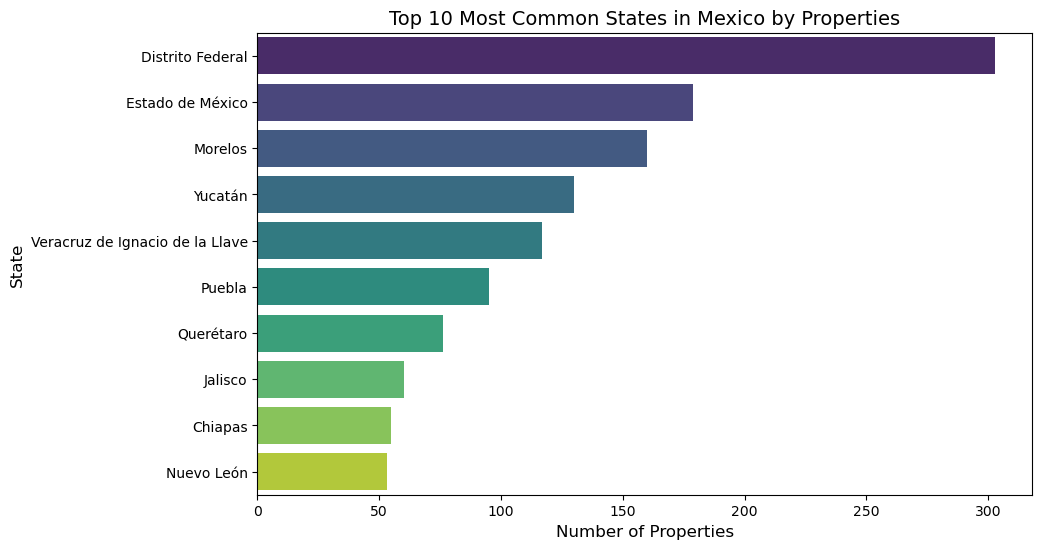

In [47]:
#set the figure size
plt.figure(figsize=(10,6))

# Create a bar plot
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")

#Add labels and title
plt.xlabel("Number of Properties", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("Top 10 Most Common States in Mexico by Properties", fontsize=14)

# SHow the plot
plt.show()

In [48]:
# Get descriptive statistics for area_m2 and price_usd
print(df[['area_m2', 'price_usd']].describe())

           area_m2      price_usd
count  1736.000000    1736.000000
mean    170.261521  115331.980800
std      80.594539   65426.173793
min      60.000000   33157.894737
25%     101.750000   65789.473684
50%     156.000000   99262.132105
75%     220.000000  150846.665000
max     385.000000  326733.660000


# Histogram for area_m2

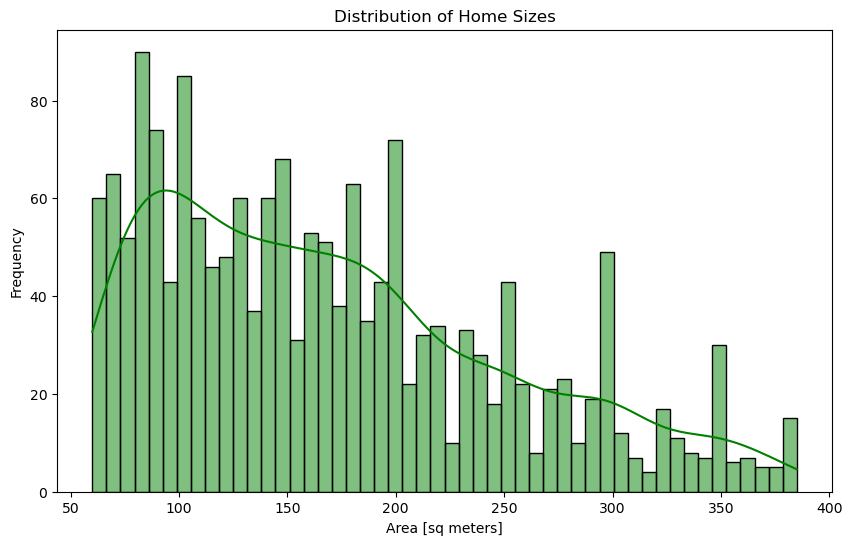

In [49]:
# Set figure size
plt.figure(figsize=(10,6))

#Create histogrsm
sns.histplot(df['area_m2'], bins=50, kde=True, color="green")

# Labels and title
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes")

# Show the plot
plt.show()

# Horizontal Boxplot for area_m2

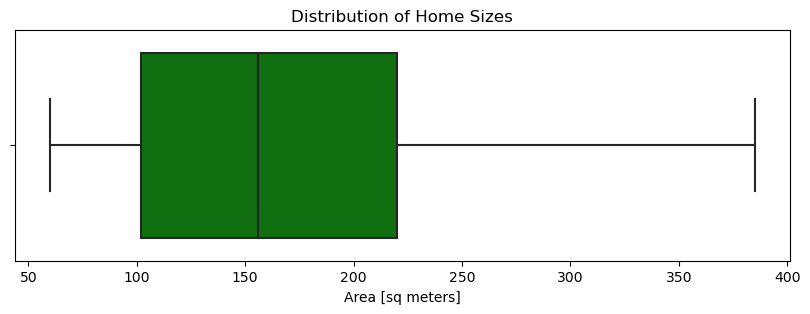

In [50]:
# Set figure size
plt.figure(figsize=(10,3))

# Create hosrizontal boxplot
sns.boxplot(x=df['area_m2'], color="green")

# Labels and title
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes")

# Show the plot
plt.show()

# Histogram for price_usd

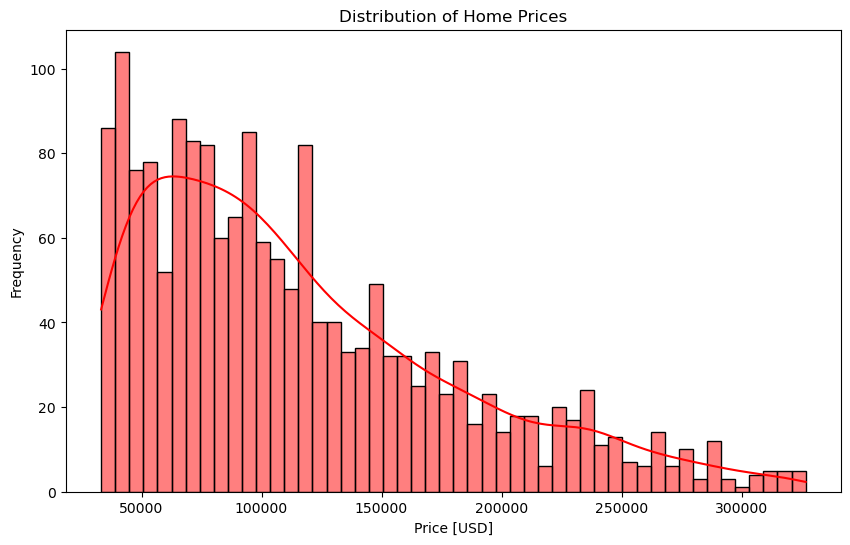

In [51]:
# Set figure size
plt.figure(figsize=(10,6))

#Create histogrsm
sns.histplot(df['price_usd'], bins=50, kde=True, color="red")

# Labels and title
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices")

# Show the plot
plt.show()

# Horizontal Boxplot for price_usd

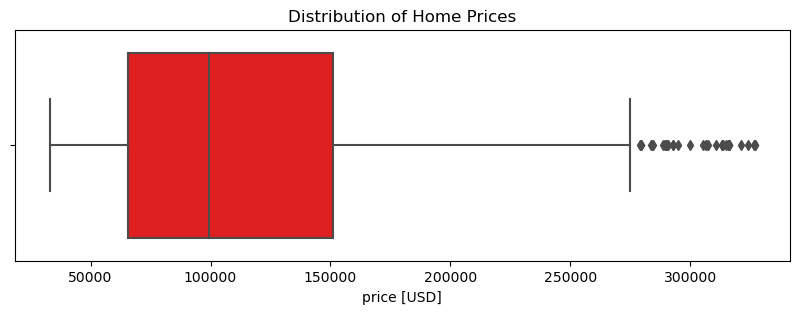

In [52]:
# Set figure size
plt.figure(figsize=(10,3))

# Create hosrizontal boxplot
sns.boxplot(x=df['price_usd'], color="red")

# Labels and title
plt.xlabel("price [USD]")
plt.title("Distribution of Home Prices")

# Show the plot
plt.show()

# Comparing price per square meter

In [53]:
df["price_per_m2"] = df["price_usd"] / df["area_m2"]

# Hsitogram for price_per_m2

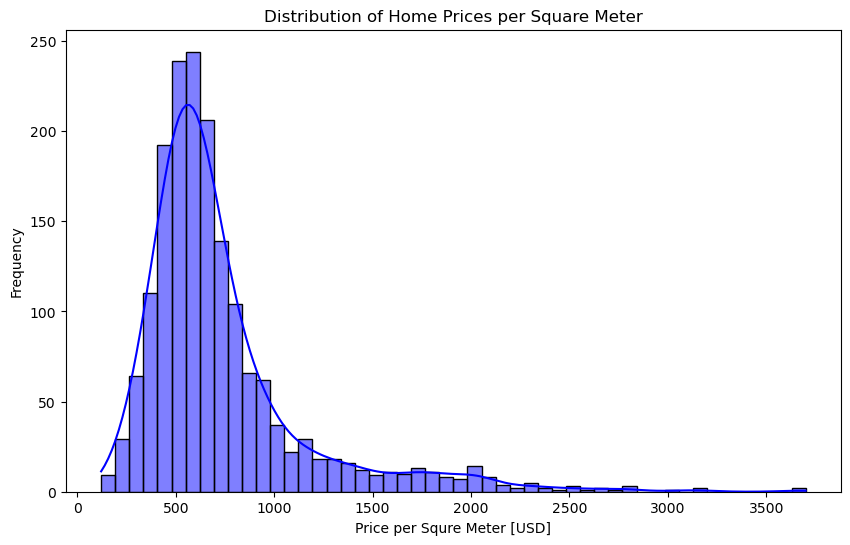

In [54]:
# Set figure size
plt.figure(figsize=(10,6))

#Create histogrsm
sns.histplot(df['price_per_m2'], bins=50, kde=True, color="blue")

# Labels and title
plt.xlabel("Price per Squre Meter [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Prices per Square Meter")

# Show the plot
plt.show()

# Horizontal Boxplot for price_per_m2

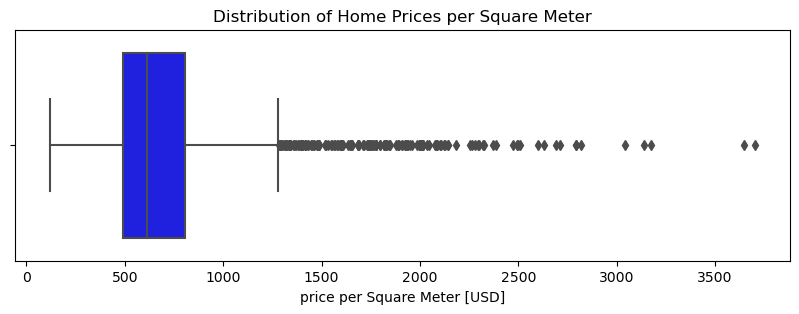

In [55]:
# Set figure size
plt.figure(figsize=(10,3))

# Create hosrizontal boxplot
sns.boxplot(x=df['price_per_m2'], color="blue")

# Labels and title
plt.xlabel("price per Square Meter [USD]")
plt.title("Distribution of Home Prices per Square Meter")

# Show the plot
plt.show()

# Compare price_per_m2 by State

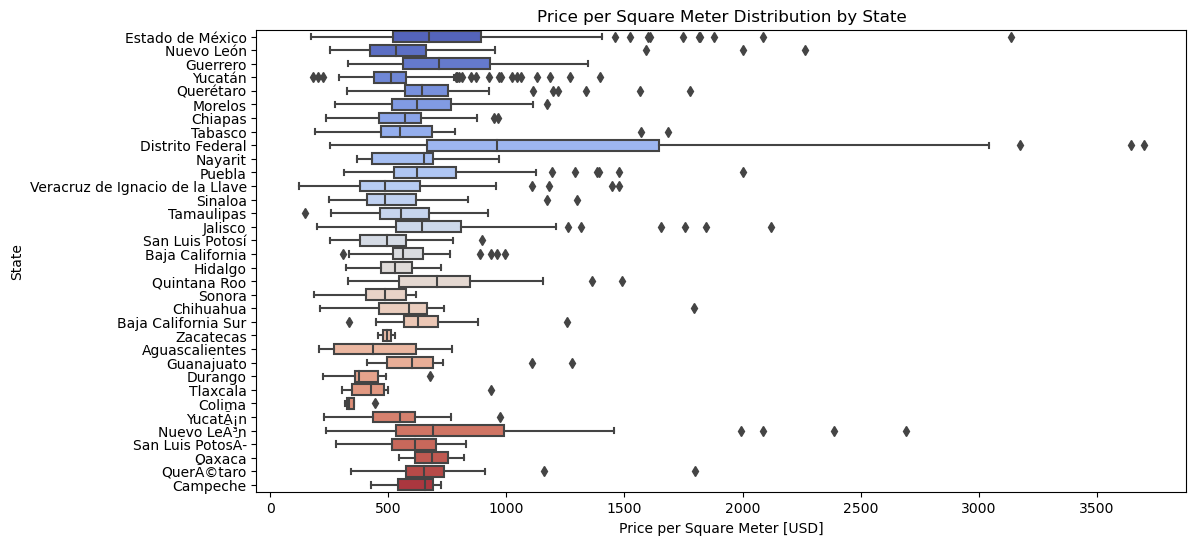

In [56]:
# Set figure size
plt.figure(figsize=(12,6))

# Create boxplot
sns.boxplot(data=df, x="price_per_m2", y="state", palette="coolwarm")

# labels and title
plt.xlabel("Price per Square Meter [USD]")
plt.ylabel("State")
plt.title("Price per Square Meter Distribution by State")

#Show the plot
plt.show()

# Correlation

In [57]:
# Compute correlation between area and price per square meter

correlation = df["area_m2"].corr(df["price_per_m2"])
print(f"Correlation between area and price per square meter: {correlation:2f}")

Correlation between area and price per square meter: -0.276021


#  Most expensive & cheapest states

In [58]:
#df["price_per_m2"] = pd.to_numeric(df["price_per_m2"], errors="coerce")

In [59]:
# Get the top 5 states with the highest median price per square meter
expensive_states = df.groupby("state").agg({"price_per_m2": "median"}).sort_values("price_per_m2", ascending=False).head(5)
print("Top 5 Most Expensive States (Median Price per m2): ")
print(expensive_states)

Top 5 Most Expensive States (Median Price per m2): 
                  price_per_m2
state                         
Distrito Federal    958.894000
Guerrero            715.030821
Quintana Roo        707.912466
Nuevo LeÃ³n         687.265348
Oaxaca              683.019737


In [60]:
# Get the top 5 states with the lowest median price per square meter
cheapest_states = df.groupby("state").agg({"price_per_m2": "median"}).sort_values("price_per_m2").head(5)
print("Top 5 Most Cheapest States (Median Price per m2): ")
print(cheapest_states)

Top 5 Most Cheapest States (Median Price per m2): 
                                 price_per_m2
state                                        
Colima                             334.168755
Durango                            376.332000
Tlaxcala                           424.561672
Aguascalientes                     436.437618
Veracruz de Ignacio de la Llave    484.715600


# Session 3
# Research Questions

In [61]:
mean_price_by_state = df.groupby("state").agg({"price_usd": "mean"}).sort_values("price_usd", ascending=False)
print(mean_price_by_state)

                                     price_usd
state                                         
Nuevo LeÃ³n                      158712.380000
Querétaro                        141521.234307
Guanajuato                       133277.965833
Distrito Federal                 128347.267365
Quintana Roo                     128065.415734
Chihuahua                        127073.851184
Jalisco                          123386.472237
QuerÃ©taro                       122898.905962
Estado de México                 122723.490600
Campeche                         121734.633333
Puebla                           121732.974294
Guerrero                         119854.276015
Sonora                           114547.881798
San Luis PotosÃ­                 113983.736250
Morelos                          112697.295615
Nuevo León                       112529.309891
Aguascalientes                   110543.888316
Yucatán                          109715.606368
Baja California Sur              109069.339158
YucatÃ¡n     

# Bar Chart of mean_price_by_state

<Figure size 1200x600 with 0 Axes>

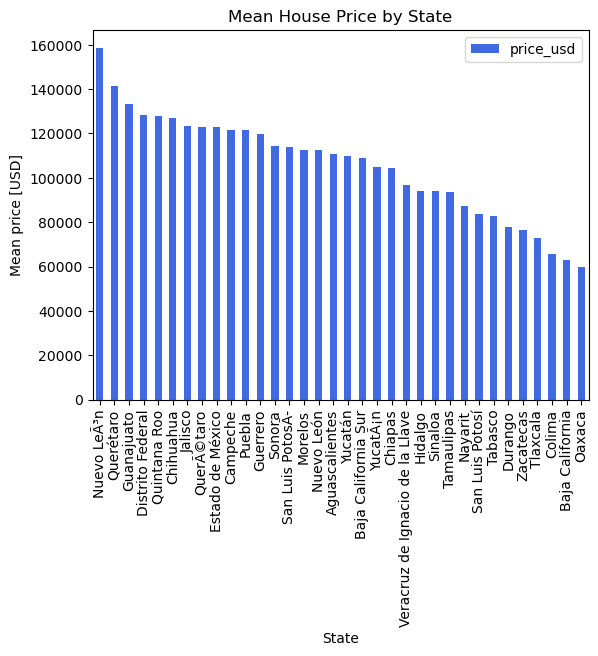

In [62]:
#set figure size
plt.figure(figsize=(12,6))

# Plot barc hart
mean_price_by_state.plot(kind="bar", color="royalblue")
plt.xlabel("State")
plt.ylabel("Mean price [USD]")
plt.title("Mean House Price by State")
plt.xticks(rotation=90)

# Show chart
plt.show()

In [63]:
df.head()

property_type             state        lat         lon  area_m2  price_usd  \
0         house  Estado de México  19.560181  -99.233528    150.0   67965.56   
1         house        Nuevo León  25.688436 -100.198807    186.0   63223.78   
2     apartment          Guerrero  16.767704  -99.764383     82.0   84298.37   
3     apartment          Guerrero  16.829782  -99.911012    150.0   94308.80   
4         house           Yucatán  21.052583  -89.538639    205.0  105191.37   

   price_per_m2  
0    453.103733  
1    339.912796  
2   1028.028902  
3    628.725333  
4    513.128634

In [64]:
mean_price_pr_m2_by_state = df.groupby("state").agg({"price_per_m2": "mean"}).sort_values("price_per_m2", ascending=False)
print(mean_price_pr_m2_by_state)

                                 price_per_m2
state                                        
Distrito Federal                  1175.889150
Nuevo LeÃ³n                        900.146764
Estado de México                   763.753423
Guerrero                           761.557207
Jalisco                            743.568106
Quintana Roo                       736.455283
Puebla                             700.701977
Querétaro                          695.235548
Oaxaca                             683.019737
QuerÃ©taro                         675.524290
Guanajuato                         672.908100
Baja California Sur                662.401955
Morelos                            649.383991
Tabasco                            643.503347
Nuevo León                         623.840199
Campeche                           601.291762
Nayarit                            599.293638
Baja California                    598.852981
San Luis PotosÃ­                   592.960190
Chihuahua                         

<Figure size 1200x600 with 0 Axes>

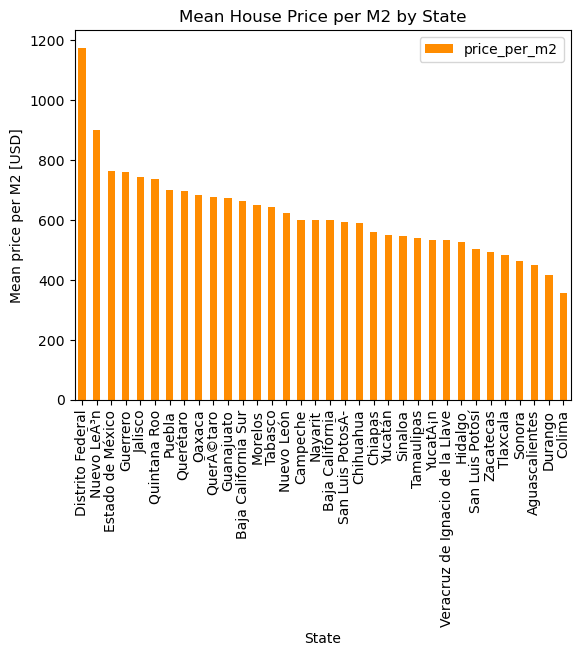

In [65]:
#set figure size
plt.figure(figsize=(12,6))

# Plot barc hart
mean_price_pr_m2_by_state.plot(kind="bar", color="darkorange")
plt.xlabel("State")
plt.ylabel("Mean price per M2 [USD]")
plt.title("Mean House Price per M2 by State")
plt.xticks(rotation=90)

# Show chart
plt.show()

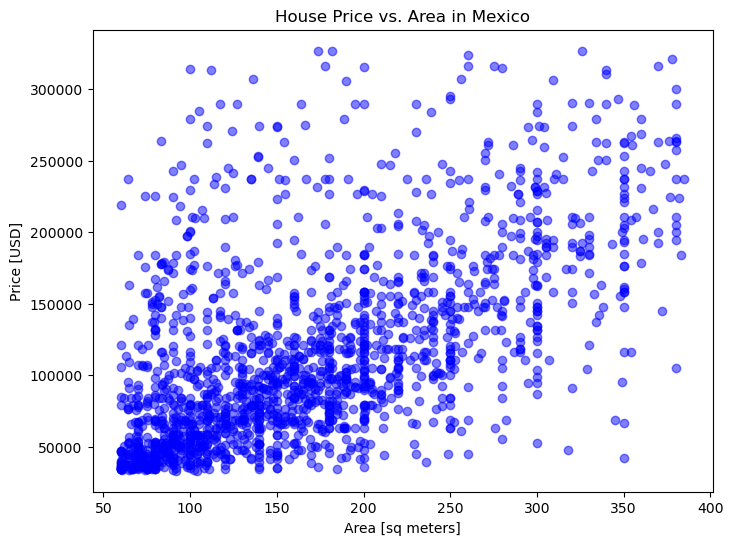

In [66]:
# Scatter plot of price Vs. Area

# Set figure size
plt.figure(figsize=(8,6))

# Plot scatter chart
plt.scatter(df["area_m2"], df["price_usd"], alpha=0.5, color="blue")
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("House Price vs. Area in Mexico")

# Show chart
plt.show()

In [67]:
# Compute correlation between area and price in Mexico

correlation = df["area_m2"].corr(df["price_usd"])
print(f"Correlation between area and price: {correlation:2f}")

Correlation between area and price: 0.585518


In [68]:
# Morelos Data
df_morelos = df[df["state"] == "Morelos"]
df_morelos.head() # check filtered data

property_type    state        lat        lon  area_m2  price_usd  \
6          house  Morelos  18.812605 -98.954826    281.0  151509.56   
9          house  Morelos  18.804197 -98.932816    117.0   63223.78   
18         house  Morelos  18.855343 -99.241142     73.0   36775.16   
49         house  Morelos  18.804197 -98.932816    130.0   65858.10   
55         house  Morelos  18.960244 -99.212962    305.0  227351.46   

    price_per_m2  
6     539.179929  
9     540.374188  
18    503.769315  
49    506.600769  
55    745.414623

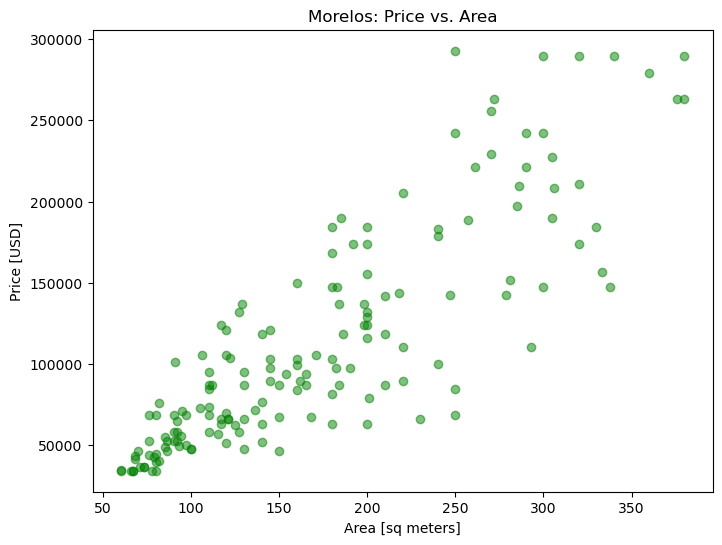

In [69]:
# Scatter plot for Morelos

# Set figure size
plt.figure(figsize=(8,6))

# Plot scatter chart
plt.scatter(df_morelos["area_m2"], df_morelos["price_usd"], alpha=0.5, color="green")
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Morelos: Price vs. Area")

# Show chart
plt.show()

In [70]:
# Compute correlation between area and price in Morelos

correlation_morelos = df_morelos["area_m2"].corr(df_morelos["price_usd"])
print("Correlation between Area and Price in Morelos: ", correlation_morelos)

Correlation between Area and Price in Morelos:  0.8498077614061482


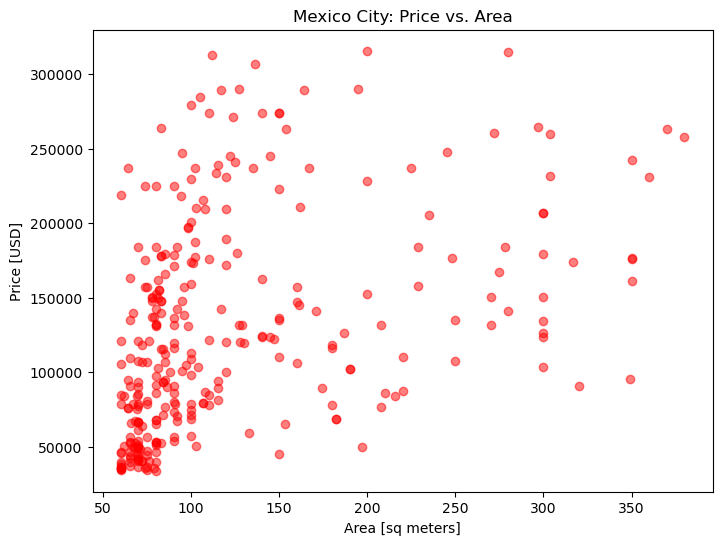

In [71]:
#Filter Distrito Fedral
df_mexico_city = df[df["state"] == "Distrito Federal"]

# Scatter plot of price Vs. Area in Distrito Federal

# Set figure size
plt.figure(figsize=(8,6))

# Plot scatter chart
plt.scatter(df_mexico_city["area_m2"], df_mexico_city["price_usd"], alpha=0.5, color="red")
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Mexico City: Price vs. Area")

# Show chart
plt.show()

In [72]:
correlation_mexico_city = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print("Correlation between Area and Price in Mexico City: ", correlation_mexico_city)

Correlation between Area and Price in Mexico City:  0.41070392058534355


In [73]:
# Correlation between Area and Price in different states
df.groupby("state")[["area_m2",
                    "price_usd"]].corr().unstack().iloc[:,1]

state
Aguascalientes                     0.873437
Baja California                    0.658334
Baja California Sur                0.880583
Campeche                           0.824161
Chiapas                            0.755961
Chihuahua                          0.636292
Colima                             0.988235
Distrito Federal                   0.410704
Durango                            0.909258
Estado de México                   0.630110
Guanajuato                         0.601482
Guerrero                           0.674457
Hidalgo                            0.822157
Jalisco                            0.612017
Morelos                            0.849808
Nayarit                            0.774295
Nuevo LeÃ³n                        0.453979
Nuevo León                         0.666974
Oaxaca                            -1.000000
Puebla                             0.772550
QuerÃ©taro                         0.909527
Querétaro                          0.768485
Quintana Roo              